In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
betas_mgpcg = np.loadtxt("experiments/2d/shear_flow/mgpcg/betas.dat")
betas_mgpcg_faster = np.loadtxt("experiments/2d/shear_flow/mgpcg_faster/betas.dat")

In [56]:
# remove zeros
betas_mgpcg = betas_mgpcg[betas_mgpcg != 0]
betas_mgpcg_faster = betas_mgpcg_faster[betas_mgpcg_faster != 0]

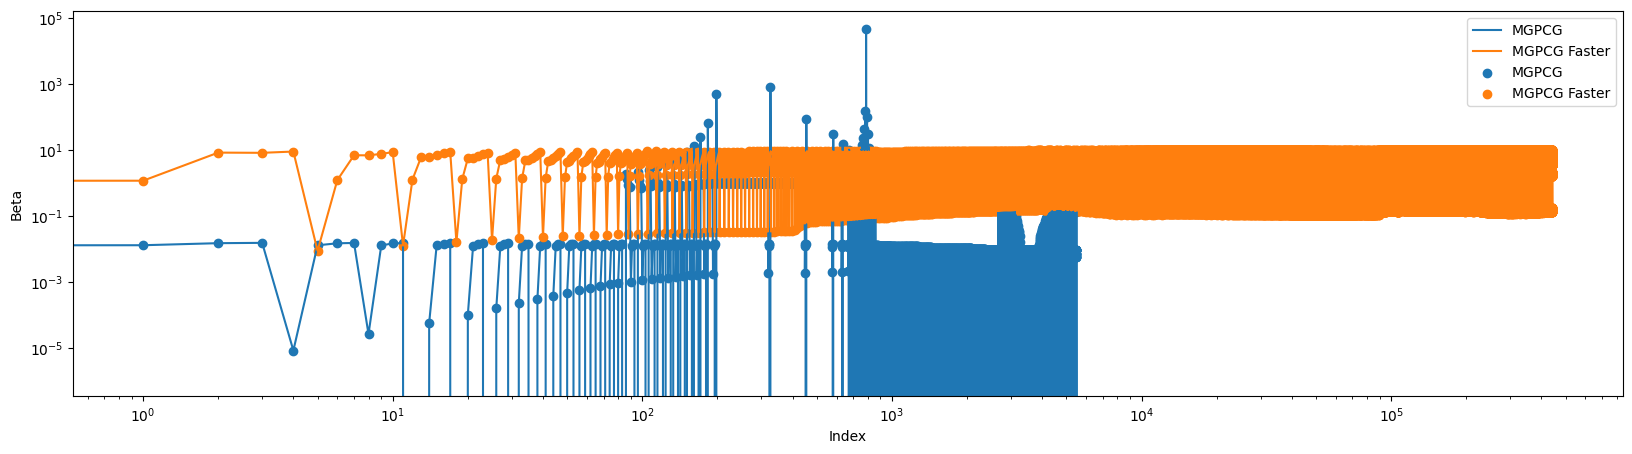

In [57]:
# plot the betas with scatter plot
import matplotlib.pyplot as plt
# wide figure
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(betas_mgpcg, label="MGPCG")
ax.plot(betas_mgpcg_faster, label="MGPCG Faster")
# scatter plot additionally
ax.scatter(range(len(betas_mgpcg)), betas_mgpcg, label="MGPCG")
ax.scatter(range(len(betas_mgpcg_faster)), betas_mgpcg_faster, label="MGPCG Faster")
ax.set_xlabel("Index")
ax.set_ylabel("Beta")
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend()
plt.show()

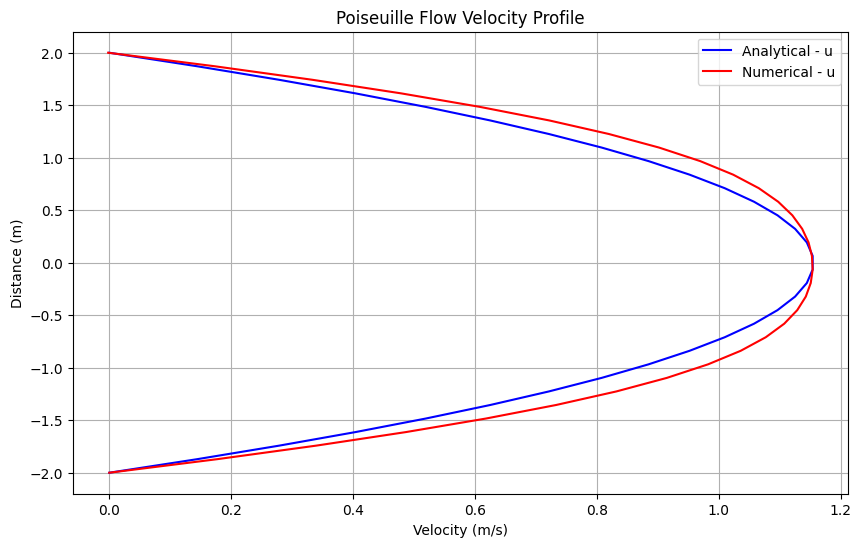

In [110]:
import numpy as np
import matplotlib.pyplot as plt

def poiseuille_flow_velocity(y, Re, L, H):
    """
    Calculates the velocity profile for Poiseuille flow between two plates.

    Arguments:
    y : numpy array
        Distance from the centerline of the domain.
    Re : float
        Reynolds number.
    L : float
        Distance between the plates.
    H : float
        Height of the domain.

    Returns:
    numpy array : Velocity at distance y from the centerline of the domain.
    """
    mu = L / Re  # dynamic viscosity
    delta_P = Re * mu * L / (H ** 2)  # pressure difference

    return (delta_P / (2 * mu)) * (H ** 2 - y ** 2)

# Parameters
u = np.loadtxt("experiments/2d/shear_flow/mgpcg_faster/u.dat")
v = np.loadtxt("experiments/2d/shear_flow/mgpcg_faster/v.dat")
L = 8.0  # Distance between the plates (units: m)
H = 2.0  # Height of the domain (units: m)
Ny = 32  # Number of points in the y direction
Re = 100.0  # Reynolds number

# Create grid
y_values = np.linspace(-H, H, Ny)

# Calculate velocity profiles along y-axis analytically
u = u[1:-1, 1:-1]
u_numerical = u[:, -1]
u_analytical = poiseuille_flow_velocity(y_values, Re, L, H)

# shift the x-values of the numerical solution, so that the first x is as zero
u_numerical = u_numerical - u_numerical[0]

# Scale the analytical solution to match the numerical solution
u_analytical *= u_numerical.max() / u_analytical.max()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(u_analytical, y_values, label='Analytical - u', color='blue')
plt.plot(u_numerical, y_values, label='Numerical - u', color='red')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Distance (m)')
plt.title('Poiseuille Flow Velocity Profile')
plt.legend()
plt.grid(True)
plt.show()
